### Name - Bolonghe B.P.M
### Index No - 190095C

628.3179815987448
puk
1.0


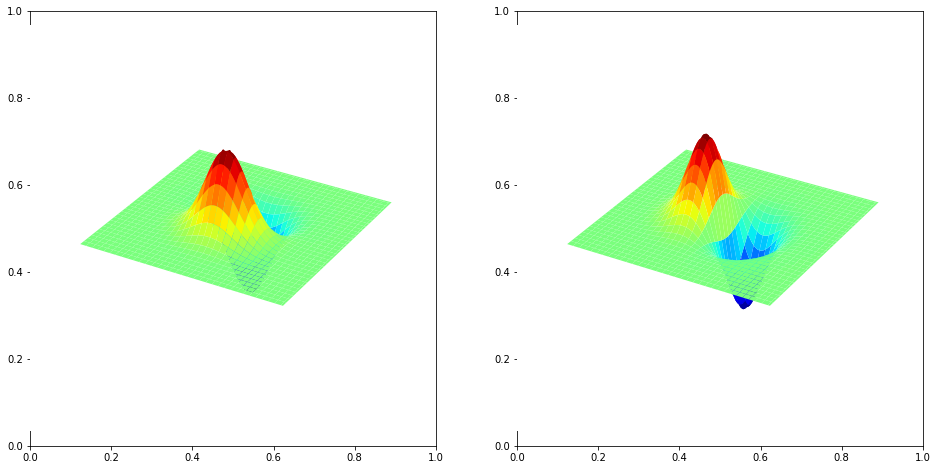

In [10]:
# Question 1

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')


delta=0.1
xx,yy = np.meshgrid(np.arange(-5,5+delta,delta),np.arange(-5,5+delta,delta))

sigma = 1
g = np.exp(-(xx**2 + yy**2)/(2*sigma**2))
print(np.sum(g))
g/=np.sum(g)
print('puk')
print(np.sum(g))
sobel_v=np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=np.float32)
g_x = cv.filter2D(g,-1,sobel_v)

sobel_h=np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)
g_y = cv.filter2D(g,-1,sobel_h)

surf1= ax1.plot_surface(xx,yy,g_x,cmap=cm.jet,linewidth=0,antialiased=True)
surf2= ax2.plot_surface(xx,yy,g_y,cmap=cm.jet,linewidth=0,antialiased=True)
ax1.axis('off')
ax2.axis('off')
plt.show()

In [11]:
g = np.exp(-(xx**2 + yy**2)/(2*sigma**2))/(2*np.pi*sigma**2)
print(np.sum(g))

99.99991260496277


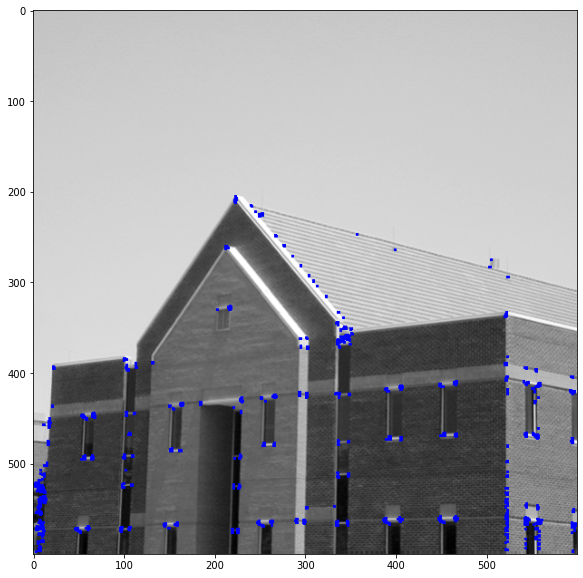

In [12]:
### Question2
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread(r'D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\coding assignments\Exercise_4\Images\building.tif',cv.IMREAD_COLOR)
assert im is not None

gray=cv.cvtColor(im, cv.COLOR_BGR2GRAY)
gray =np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)

dst = cv.dilate(dst, None)
im[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(10,10))
plt.imshow(im)
plt.show()
#cv.imshow('dst',im)
#cv.waitKey(0)
#cv.destroyAllWindows()

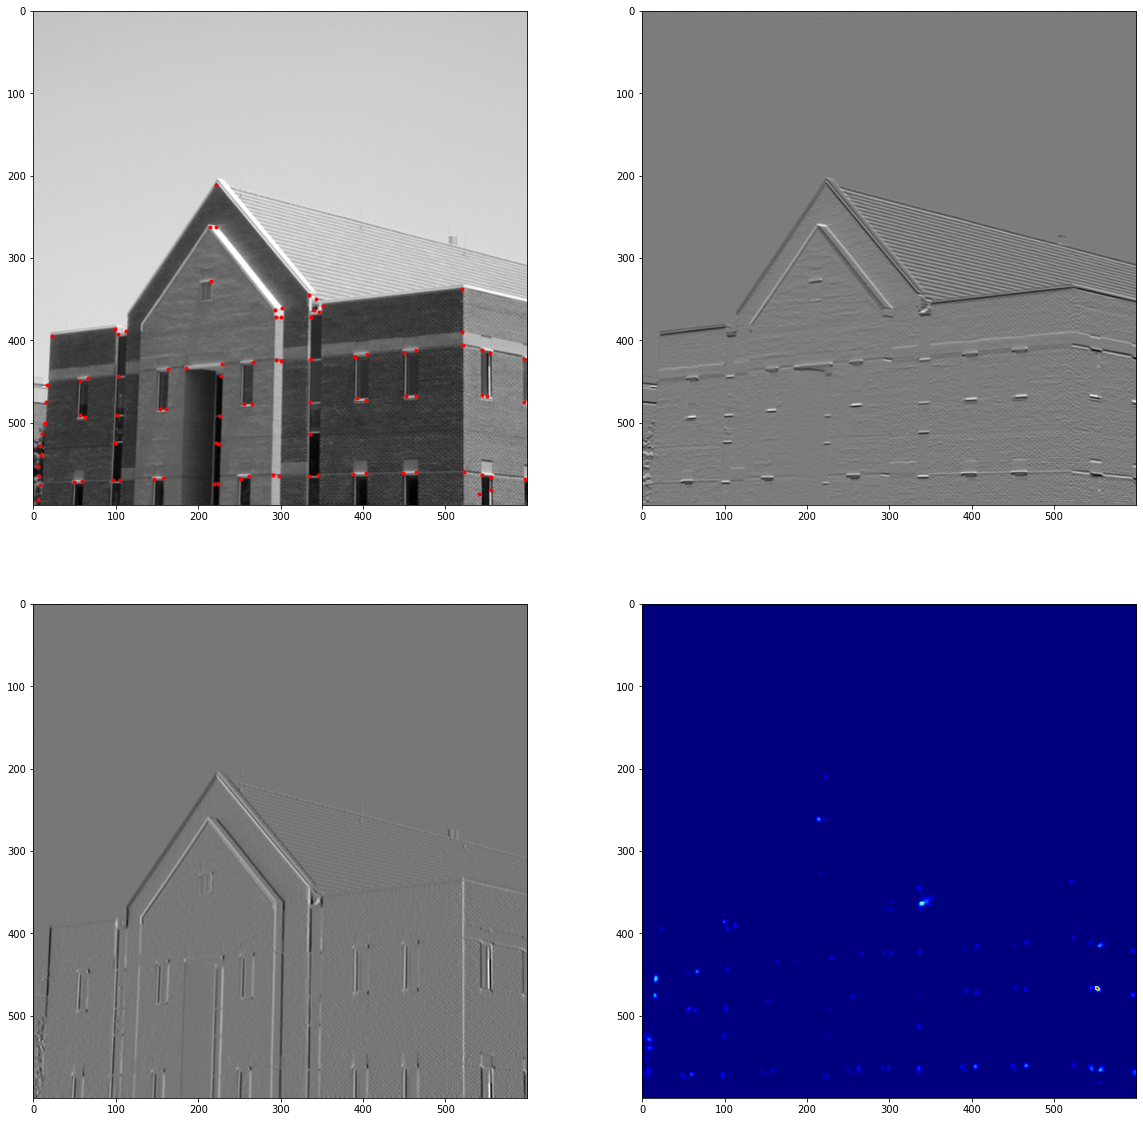

In [13]:
### Question 3

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

im = cv.imread(r'D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\coding assignments\Exercise_4\Images\building.tif',cv.IMREAD_COLOR)
assert im is not None

I = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
I = np.float32(I)
sobel_v=np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=np.float32)
g_x = cv.filter2D(g,-1,sobel_v)

sobel_h=np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)
g_y = cv.filter2D(g,-1,sobel_h)

Ix= cv.filter2D(I,-1,sobel_v)
Iy= cv.filter2D(I,-1,sobel_h)

sigma =3
ksize =7
m11 = cv.GaussianBlur(Ix*Ix,(ksize, ksize),sigma)
m12= cv.GaussianBlur(Ix*Iy,(ksize, ksize),sigma)
m21 = m12
m22 = cv.GaussianBlur(Iy*Iy,(ksize, ksize),sigma)

det = m11*m22-m12*m21
trace = m11+m22
alpha = 0.04
R = det - alpha*trace**2
R[R<1e8]=0
coordinates = peak_local_max(R,min_distance=2)

fig,ax = plt.subplots(2,2,figsize=(20,20))
ax[0,0].imshow(im, cmap='gray')
ax[0,0].plot(coordinates[:,1],coordinates[:,0],'r.')
ax[0,1].imshow(Ix+127, cmap='gray')
ax[1,0].imshow(Iy+127, cmap='gray')
ax[1,1].imshow(R+127, cmap=cm.jet)
plt.show()


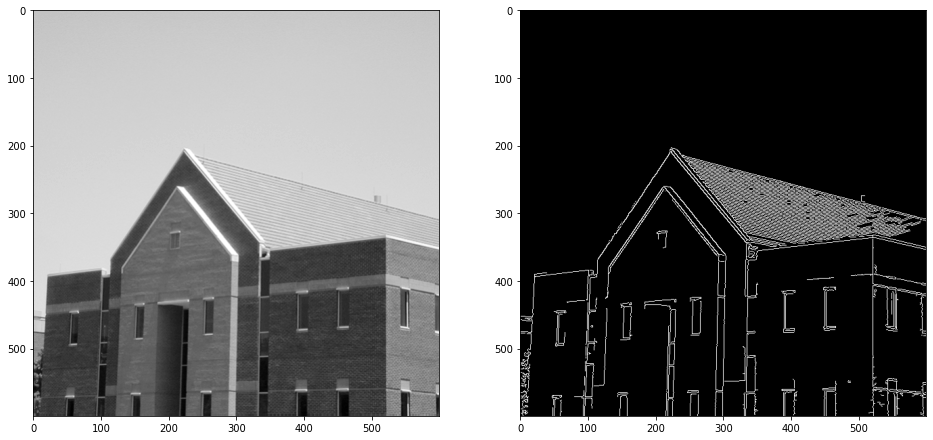

In [14]:
### Question 4
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread(r'D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\coding assignments\Exercise_4\Images\building.tif',cv.IMREAD_GRAYSCALE)
assert im is not None
edges = cv.Canny(im,100,200,)

fig,ax = plt.subplots(1,2,figsize=(16,20))
ax[0].imshow(im, cmap='gray')
ax[1].imshow(edges, cmap='gray')
plt.show()

In [17]:
import cv2

# Read the original image
img = cv2.imread(r'D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\coding assignments\Exercise_4\Images\building.tif') 
# Display original image
assert img is not None
cv2.imshow('Original', img)
cv2.waitKey(0)

# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)

# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [20]:
import cv2
import numpy as np

image = cv2.imread(r'D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\coding assignments\Exercise_4\Images\building.tif')

# Print error message if image is null
if image is None:
    print('Could not read image')

# Apply identity kernel
kernel1 = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])

identity = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)

cv2.imshow('Original', image)
cv2.imshow('Identity', identity)
    
cv2.waitKey()
cv2.imwrite('identity.jpg', identity)
cv2.destroyAllWindows()

# Apply blurring kernel
kernel2 = np.ones((5, 5), np.float32) / 25
img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel2)

cv2.imshow('Original', image)
cv2.imshow('Kernel Blur', img)
    
cv2.waitKey()
cv2.imwrite('blur_kernel.jpg', img)
cv2.destroyAllWindows()

In [22]:
# Import packages
import cv2

# Lists to store the bounding box coordinates
top_left_corner=[]
bottom_right_corner=[]

# function which will be called on mouse input
def drawRectangle(action, x, y, flags, *userdata):
  # Referencing global variables 
  global top_left_corner, bottom_right_corner
  # Mark the top left corner when left mouse button is pressed
  if action == cv2.EVENT_LBUTTONDOWN:
    top_left_corner = [(x,y)]
    # When left mouse button is released, mark bottom right corner
  elif action == cv2.EVENT_LBUTTONUP:
    bottom_right_corner = [(x,y)]    
    # Draw the rectangle
    cv2.rectangle(image, top_left_corner[0], bottom_right_corner[0], (0,255,0),2, 8)
    cv2.imshow("Window",image)

# Read Images
image = cv2.imread(r"D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\coding assignments\Exercise_4\Images\building.tif")
# Make a temporary image, will be useful to clear the drawing
temp = image.copy()
# Create a named window
cv2.namedWindow("Window")
# highgui function called when mouse events occur
cv2.setMouseCallback("Window", drawRectangle)

k=0
# Close the window when key q is pressed
while k!=113:
  # Display the image
  cv2.imshow("Window", image)
  k = cv2.waitKey(0)
  # If c is pressed, clear the window, using the dummy image
  if (k == 99):
    image= temp.copy()
    cv2.imshow("Window", image)

cv2.destroyAllWindows()